# *The Mean*

In [1]:
distribution = [0,2,3,3,3,4,13]

import numpy as np

distribution_np = np.array(distribution)
mean = distribution_np.mean()

center = ((distribution[0] + distribution[6])/2 == mean)
print(center)

less = [abs(i-mean) for i in distribution if (i < mean)]
print(np.sum(less))

more = [abs(i-mean) for i in distribution if (i > mean)]
print(np.sum(more))

equal_distances = (np.sum(less) == np.sum(more))
equal_distances

False
9.0
9.0


True

### The Mean as a Balance Point

In [2]:
import numpy as np
from numpy.random import randint, seed
equal_distances = 0

for i in range(5000):
    np.random.seed(i)
    distribution = randint(1000, size=10)
    mean = distribution.mean()
    sum_below = round(np.array([abs(i-mean) for i in distribution if (i < mean)]).sum(), 1)
    sum_above = round(np.array([abs(i-mean) for i in distribution if (i > mean)]).sum(), 1)
    equal_distances += 1
    
        
print(equal_distances)

5000


### An Alternative Definition

In [3]:
def calc_mean(arr):
    mean = 0
    i = 1
    for _ in range(len(arr)):
        mean += arr[i-1]
        i += 1
    return mean/len(arr)


distribution_1 = [42, 24, 32, 11]
distribution_2 = [102, 32, 74, 15, 38, 45, 22]
distribution_3 = [3, 12, 7, 2, 15, 1, 21]

mean_1 = calc_mean(distribution_1)
mean_2 = calc_mean(distribution_2)
mean_3 = calc_mean(distribution_3)

print(mean_1)
print(mean_2)
print(mean_3)

27.25
46.857142857142854
8.714285714285714


### Mean House Prices

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
houses = pd.read_csv('AmesHousing_1.txt', sep='\t')

def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
        
    return sum_distribution / len(distribution)

function_mean = mean(houses['SalePrice'])
pandas_mean = houses['SalePrice'].mean()

means_are_equal = (function_mean == pandas_mean)
print(means_are_equal)

True


### Estimating the Population Mean

In [5]:
import matplotlib.pyplot as plt

pop_mean = houses['SalePrice'].mean()
print(pop_mean)

sampling_errors = []
size = 5
sampling_sizes = [size]

for i in range(0, 101):
    Sample = houses['SalePrice'].sample(n = size, random_state=i)
    size += 29
    sample_mean = Sample.mean()
    sampling_error = pop_mean - sample_mean
    sampling_errors.append(sampling_error)    
    sampling_sizes.append(size)
    
plt.scatter(sampling_sizes[:-1], sampling_errors)
plt.axhline()
plt.axvline(x=2930)
plt.xlabel('Sample size')
plt.ylabel('Sampling error')
plt.show()

180796.0600682594


<Figure size 640x480 with 1 Axes>

### Estimates from Low-Sized Samples

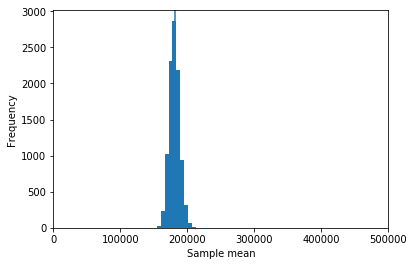

In [6]:
sampling_errors = []
prices = houses['SalePrice']
pop_mean = prices.mean()

for i in range(10000):
    Sample = prices.sample(n=100, random_state=i)
    sample_mean = Sample.mean()
    sampling_errors.append(sample_mean)
    
plt.hist(sampling_errors)
plt.axvline(pop_mean)
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.xlim(0,500000)
plt.show()

### The Sample Mean as Unbiased Estimator

In [7]:
population = [3, 7, 2]
pop_mean = mean(population)
print(pop_mean)

samples = [[3, 7], [3, 2], [7, 2], 
           [7, 3], [2, 3], [2, 7]]
sample_means = []

for sample in samples:
    sample_means.append(mean(sample))
    
mean_of_sample_means = mean(sample_means)
print(mean_of_sample_means)

unbiased = (pop_mean == mean_of_sample_means)
print(unbiased)

4.0
4.0
True


# *The Weighted Mean and The Median*

### Introduction

In [8]:
data = [[2006, 181761.648000, 625],
        [2007, 185138.207493, 694],
        [2008, 178841.750804, 622],
        [2009, 181404.567901, 648],
        [2010, 172597.598240, 341]]

houses_per_year = pd.DataFrame(data, columns=['Year', 'Mean Price', 'Houses Sold'])

mean_new = houses_per_year['Mean Price'].mean()
mean_original = houses['SalePrice'].mean()
difference = mean_original - mean_new

print(mean_original)
print(mean_new)
print(difference)

180796.0600682594
179948.7544876
847.3055806593911


### Different Weights

In [9]:
sum_per_year = [(houses_per_year['Mean Price'][i] * houses_per_year['Houses Sold'][i]) for i in range(5)]
print(sum_per_year)

houses_sold = houses_per_year['Houses Sold'].sum()
print(houses_sold)

weighted_mean = round(sum(sum_per_year)/houses_sold, 6)
print(weighted_mean)

mean_original = round(houses['SalePrice'].mean(), 6)
print(mean_original)

difference = weighted_mean - mean_original
print(difference)

[113601029.99999999, 128485916.000142, 111239569.000088, 117550159.99984801, 58855780.99984]
2930
180796.060068
180796.060068
0.0


### The Weighted Mean

In [10]:
import numpy as np

def calc_weighted_mean(items, weights):
    weighted_items = [items[i]*weights[i] for i in range(len(items))]
    weighted_mean = sum(weighted_items)/sum(weights)
    return weighted_mean

weighted_mean_function = calc_weighted_mean(houses_per_year['Mean Price'], houses_per_year['Houses Sold'])
print(weighted_mean_function)

weighted_mean_numpy = np.average(houses_per_year['Mean Price'], weights=houses_per_year['Houses Sold'])
print(weighted_mean_numpy)

equal = (round(weighted_mean_function, 10) == round(weighted_mean_numpy, 10))
print(equal)

180796.0600682314
180796.0600682314
True


### The Median for Open-ended Distributions

In [11]:
distribution1 = [23, 24, 22, '20 years or lower,', 23, 42, 35]
distribution2 = [55, 38, 123, 40, 71]
distribution3 = [45, 22, 7, '5 books or lower', 32, 65, '100 books or more']

median1 = 23
median2 = 55
median3 = 32

print(median1)
print(median2)
print(median3)

23
55
32


### Distributions with Even Number of Values

In [12]:
rms_abv_grd = houses['TotRms AbvGrd'].copy()
rms_abv_grd.replace('10 or more', 10, inplace=True)
rms_abv_grd = rms_abv_grd.astype(int)
rms_abv_grd.sort_values(inplace=True)
print(rms_abv_grd.head(), '\n')

middle_indices = [int(len(rms_abv_grd)/2), int(len(rms_abv_grd)/2 + 1)]
print(middle_indices, '\n')

middle_values = rms_abv_grd.iloc[middle_indices]
print(middle_values, '\n')

median = middle_values.mean()
print(median)

1901    2
2679    3
975     3
269     3
1600    3
Name: TotRms AbvGrd, dtype: int64 

[1465, 1466] 

953     6
2264    6
Name: TotRms AbvGrd, dtype: int64 

6.0


### The Median as a Resistant Statistic

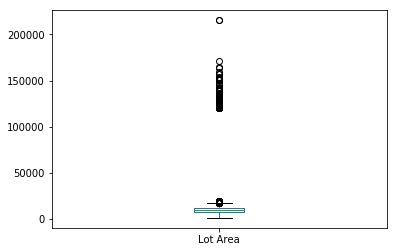

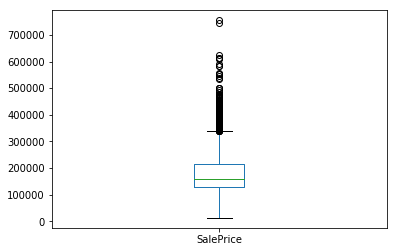

3680.7051194539254
20796.060068259394


In [13]:
import matplotlib.pyplot as plt

houses['Lot Area'].plot.box()
plt.show()

houses['SalePrice'].plot.box()
plt.show()

lotarea_mean = houses['Lot Area'].mean()
lotarea_median = houses['Lot Area'].median()

saleprice_mean = houses['SalePrice'].mean()
saleprice_median = houses['SalePrice'].median()

lotarea_difference = lotarea_mean - lotarea_median
print(lotarea_difference)

saleprice_difference = saleprice_mean - saleprice_median
print(saleprice_difference)

### The Median for Ordinal Scales

5.563139931740614
5.0


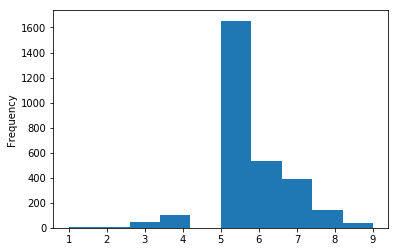

In [14]:
mean = houses['Overall Cond'].mean()
median = houses['Overall Cond'].median()

print(mean)
print(median)

houses['Overall Cond'].plot.hist()
plt.show()

more_representative = mean

# *The Mode*

In [15]:
import pandas as pd
houses = pd.read_csv('AmesHousing_1.txt', sep='\t')

scale_land = 'ordinal'
scale_roof = 'nominal'
kitchen_variable = 'discrete'

### The Mode for Ordinal Variables

In [16]:
def calc_mode(arr):
    values_dict = {}
    
    for item in arr:
        if item in values_dict:
            values_dict[item] += 1
        else:
            values_dict[item] = 1
            
    return max(values_dict, key = values_dict.get)

mode_function = calc_mode(houses['Land Slope'])
print(mode_function, '\n')

mode_method = houses['Land Slope'].mode()
print(mode_method, '\n')

same = (mode_function == mode_method)
print(same[0])

Gtl 

0    Gtl
dtype: object 

True


### The Mode for Nominal Variables 

In [17]:
def mode(array):
    counts = {}
    
    for value in array:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    
    return (counts, max(counts, key = counts.get))

value_counts = mode(houses['Roof Style'])[0]
mode = mode(houses['Roof Style'])[1]

print('value counts: ', value_counts)
print('\nmode: ', mode)
print()
print(houses['Roof Style'].value_counts())

value counts:  {'Hip': 551, 'Gable': 2321, 'Mansard': 11, 'Gambrel': 22, 'Shed': 5, 'Flat': 20}

mode:  Gable

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64


### The Mode for Discrete Variables

In [18]:
print(houses['Bedroom AbvGr'].value_counts(), '\n')
bedroom_variable = 'discrete'

bedroom_mode = houses['Bedroom AbvGr'].mode()
print(bedroom_mode[0], '\n')

print(houses['SalePrice'].value_counts().head())
price_variable = 'continuous'

3    1597
2     743
4     400
1     112
5      48
6      21
0       8
8       1
Name: Bedroom AbvGr, dtype: int64 

3 

135000    34
140000    33
130000    29
155000    28
145000    26
Name: SalePrice, dtype: int64


### Special Cases

In [19]:
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in houses['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table, '\n')

interv = gr_freq_table[gr_freq_table == max(gr_freq_table)].index[0]
print(interv, '\n')

mode = int((interv.left + interv.right) / 2)
print('Mode', mode, '\n')

mean = houses['SalePrice'].mean()
print('Mean', mean, '\n')

median = houses['SalePrice'].median()
print('Median', median)

sentence_1 = True
sentence_2 = True

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64 

(100000, 200000] 

Mode 150000 

Mean 180796.0600682594 

Median 160000.0


### Skewed Distributions

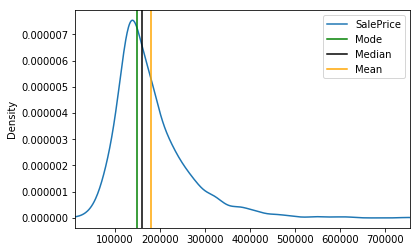

In [20]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                     houses['SalePrice'].max()
                                    )
                            )
plt.axvline(150000, color = 'Green', label = 'Mode')
plt.axvline(houses['SalePrice'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()
plt.show()

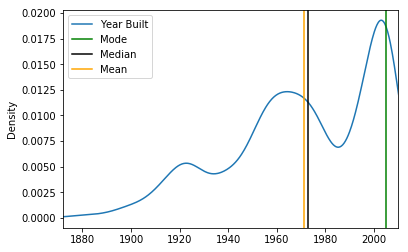

In [21]:
houses['Year Built'].plot.kde(xlim = (houses['Year Built'].min(),
                                     houses['Year Built'].max()
                                    )
                            )
plt.axvline(2005, color = 'Green', label = 'Mode')
plt.axvline(houses['Year Built'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['Year Built'].mean(), color = 'Orange', label = 'Mean')
plt.legend()
plt.show()

### Symmetrical Distributions

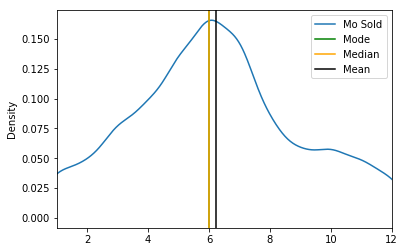

In [22]:
houses['Mo Sold'].plot.kde(xlim=(1, 12))
plt.axvline(6, color = 'Green', label = 'Mode')
plt.axvline(houses['Mo Sold'].median(), color = 'Orange', label = 'Median')
plt.axvline(houses['Mo Sold'].mean(), color = 'Black', label = 'Mean')
plt.legend()
plt.show()

# *Measures Of Variability*

### The Range

In [23]:
import pandas as pd
houses = pd.read_table('AmesHousing_1.txt')

def calc_range(arr):
    min_arr = min(arr)
    max_arr = max(arr)
    return max_arr - min_arr

range_by_year = {}

years = houses['Yr Sold']

for year in years:
    if year not in range_by_year:
        range_by_year[year] = calc_range(houses[houses['Yr Sold'] == year]['SalePrice'])
    else:
        pass
    
print(range_by_year)

one = False
two = True

{2010: 598868, 2009: 575100, 2008: 601900, 2007: 715700, 2006: 590000}


### The Average Distance

In [24]:
C = [1,1,1,1,1,1,1,1,1,21]

def calc_avg_distance(arr):
    arr_mean = np.array(C).mean()
    distances = []
    
    for i in arr:
        distances.append(arr_mean - i)
        
    dist_mean = np.array(distances).mean()
    return dist_mean

avg_distance = calc_avg_distance(C)
print(avg_distance)

0.0


### Mean Absolute Deviation

In [25]:
C = [1,1,1,1,1,1,1,1,1,21]

def calc_mad(arr):
    arr_mean = np.array(C).mean()
    distances = []
    
    for i in arr:
        distances.append(abs(arr_mean - i))
        
    dist_mean = np.array(distances).mean()
    return dist_mean

mad = calc_mad(C)
print(mad)

3.6


### Variance

In [26]:
C = [1,1,1,1,1,1,1,1,1,21]

def calc_variance(arr):
    arr_mean = np.array(C).mean()
    distances = []
    
    for i in arr:
        distances.append((arr_mean - i)**2)
        
    dist_mean = np.array(distances).mean()
    return dist_mean

variance_C = calc_variance(C)
print(variance_C)

36.0


### Standard Deviation

In [27]:
from math import sqrt

C = [1,1,1,1,1,1,1,1,1,21]

def calc_sd(arr):
    arr_mean = np.array(C).mean()
    distances = []
    
    for i in arr:
        distances.append((arr_mean - i)**2)
        
    dist_mean = np.array(distances).mean()
    return sqrt(dist_mean)

standard_deviation_C = calc_sd(C)
print(standard_deviation_C)

6.0


### Avg Variability Around the Mean

In [28]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

std_dev = standard_deviation(houses['SalePrice'])

std_dev_by_year = {}

years = houses['Yr Sold']

for year in years:
    if year not in std_dev_by_year:
        std_dev_by_year[year] = standard_deviation(houses[houses['Yr Sold'] == year]['SalePrice'])
    else:
        pass

print(std_dev_by_year, '\n')

greatest_variability = max(std_dev_by_year, key=std_dev_by_year.get)
print(greatest_variability)

lowest_variability = min(std_dev_by_year, key=std_dev_by_year.get)
print(lowest_variability)

{2010: 74521.920711871, 2009: 80794.39070298373, 2008: 75531.94622558328, 2007: 82483.28433288915, 2006: 82553.57563561267} 

2006
2010


### A Measure Of Spread

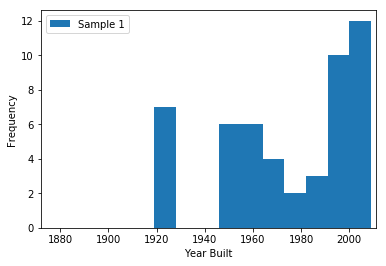

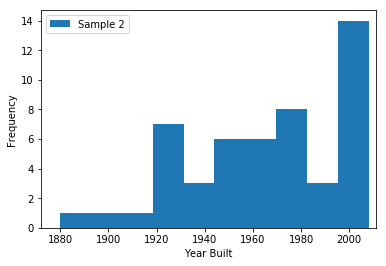

Sample 1 Std. Dev. 29.239589600403075
Sample 2 Std. Dev. 32.466234767832255


In [29]:
sample1 = houses['Year Built'].sample(50, random_state = 1)
sample2 = houses['Year Built'].sample(50, random_state = 2)

sample1.plot.hist(label = 'Sample 1', xlim = (1872, 2011))
plt.xlabel('Year Built')
plt.legend()
plt.show()

sample2.plot.hist(label = 'Sample 2', xlim = (1872, 2011))
plt.xlabel('Year Built')
plt.legend()
plt.show()

def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

bigger_spread = 'sample 2'

st_dev1 = standard_deviation(sample1)
print('Sample 1 Std. Dev.', st_dev1)

st_dev2 = standard_deviation(sample2)
print('Sample 2 Std. Dev.', st_dev2)

### The Sample Standard Deviation

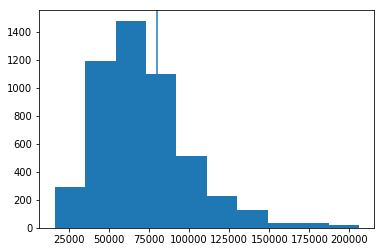

In [30]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

prices = houses['SalePrice']
st_devs = []

for i in range(5000):
    Sample = prices.sample(10, random_state = i)
    st_dev = standard_deviation(Sample)
    st_devs.append(st_dev)
    
import matplotlib.pyplot as plt

plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']))
plt.show()

### Bessel's Correction

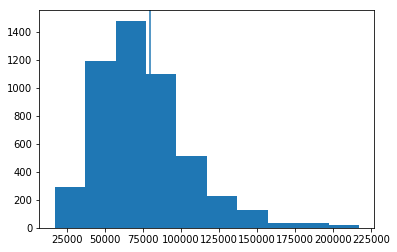

In [31]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / (len(distances)-1)
    
    return sqrt(variance)

import matplotlib.pyplot as plt
st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
    
plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']))
plt.show()

### Standard Notation

In [32]:
sample = houses.sample(100, random_state = 1)
from numpy import std, var

pandas_stdev = sample['SalePrice'].std()
numpy_stdev = std(sample['SalePrice'], ddof=1)
print(pandas_stdev)

equal_stdevs = (pandas_stdev == numpy_stdev)
print(equal_stdevs)

pandas_var = sample['SalePrice'].var()
numpy_var = var(sample['SalePrice'], ddof=1)
print(pandas_var)

equal_vars = (pandas_var == numpy_var)
print(equal_vars)

76469.14464354338
True
5847530082.515158
True


### Sample Variance - Unbiased Estimator

**With Replacement**

In [33]:
population = [0, 3, 6]

samples = [[0,3], [0,6],
           [0,0], [3,0], 
           [3,6], [3,3],
           [6,0], [6,3],
           [6,6]
          ]

# Calculating Population Std dev and Variance
from numpy import std, var

pop_var = var(population)
pop_std = std(population)

# Calculating Sample Std dev and Variance
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / (len(distances)-1)
    
    return (variance, sqrt(variance))


variances = []
st_devs = []

for i in samples:
    st_dev_n_var = standard_deviation(i)
    
    variances.append(st_dev_n_var[0])
    st_devs.append(st_dev_n_var[1])
    

from statistics import mean

equal_var = (pop_var == mean(variances))
equal_stdev = (pop_std == mean(st_devs))

print(equal_var)
print(equal_stdev)

True
False


**Without Replacement**

In [34]:
population = [0, 3, 6]

samples = [[0,3], [0,6],
           [3,0], [3,6],
           [6,0], [6,3]
          ]

# Calculating Population Std dev and Variance
from numpy import std, var

pop_var = var(population)
pop_std = std(population)

# Calculating Sample Std dev and Variance
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / (len(distances)-1)
    
    return (variance, sqrt(variance))


variances = []
st_devs = []

for i in samples:
    st_dev_n_var = standard_deviation(i)
    
    variances.append(st_dev_n_var[0])
    st_devs.append(st_dev_n_var[1])
    

from statistics import mean

equal_var = (pop_var == mean(variances))
equal_stdev = (pop_std == mean(st_devs))

print(equal_var)
print(equal_stdev)

False
False


# *Z-Scores*

### Individual Values

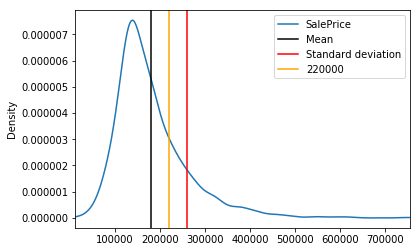

In [41]:
# Determining whether $220,000 is expensive or normal for house prices in Ames, Iowa Dataset.

import numpy as np
std = np.std(houses['SalePrice'], ddof=0)
mean = houses['SalePrice'].mean()
limits = (houses['SalePrice'].min(), houses['SalePrice'].max())

# Plotting KDE for SalePrice Column
houses['SalePrice'].plot.kde(xlim=limits)
plt.axvline(mean, color='black', label='Mean')
plt.axvline(std+mean, color='red', label='Standard deviation')
plt.axvline(220000, color= 'orange', label='220000')
plt.legend()
plt.show()

very_expensive = False

### Number of Standard Deviations

In [42]:
distance = 220000 - houses['SalePrice'].mean()
print(distance)

from numpy import std
std_Saleprice = std(houses['SalePrice'], ddof=0)
print(std_Saleprice)

st_devs_away = distance/std_Saleprice
print(st_devs_away)

39203.939931740606
79873.05865192247
0.4908280788718362


### Z-scores

In [43]:
def calc_zscore (x, arr, smpl_bool=False):
    mean = sum(arr)/len(arr)
    
    from numpy import std
    if smpl_bool:
        std_arr = std(arr, ddof=1)
    else:
        std_arr = std(arr, ddof=0)
    
    zscore = (x-mean)/std_arr
    
    return zscore

min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

min_z = calc_zscore(min_val, houses['SalePrice'])
mean_z = calc_zscore(mean_val, houses['SalePrice'])
max_z = calc_zscore(max_val, houses['SalePrice'])

print(min_z)
print(mean_z)
print(max_z)

-2.1034258973406126
0.0
7.188956446929806


### Locating Values in Different Distributions

In [45]:
# Finding least z-score for a value in different distributions

def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z

na_zsocre = z_score(200000, houses[houses['Neighborhood'] == 'NAmes']['SalePrice'], 0)
print(na_zsocre)

cc_zscore = z_score(200000, houses[houses['Neighborhood'] == 'CollgCr']['SalePrice'], 0)
print(cc_zscore)

ot_zscore = z_score(200000, houses[houses['Neighborhood'] == 'OldTown']['SalePrice'], 0)
print(ot_zscore)

ed_zscore = z_score(200000, houses[houses['Neighborhood'] == 'Edwards']['SalePrice'], 0)
print(ed_zscore)

st_zscore = z_score(200000, houses[houses['Neighborhood'] == 'Somerst']['SalePrice'], 0)
print(st_zscore)

best_investment = 'College Creek'

1.7239665910370237
-0.03334366282705464
1.7183080926865524
1.443576193848941
-0.5186390646965722


### Transforming Distributions

In [47]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)
houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )

z_mean_price = houses['z_prices'].mean()
print('z_mean_price', z_mean_price)

z_stdev_price = houses['z_prices'].std(ddof=0)
print('z_stdev_price', z_stdev_price)

lot_area_mean = houses['Lot Area'].mean()
lot_area_st_dev = houses['Lot Area'].std(ddof = 0)
houses['z_lot_area'] = houses['Lot Area'].apply(
    lambda x: ((x - lot_area_mean) / lot_area_st_dev)
    )

z_mean_area = houses['z_lot_area'].mean()
print('z_mean_area', z_mean_area)

z_stdev_area = houses['z_lot_area'].std(ddof=0)
print('z_stdev_area', z_stdev_area)

z_mean_price -1.1429992333726227e-16
z_stdev_price 1.0000000000000002
z_mean_area 8.771898641662927e-18
z_stdev_area 0.9999999999999997


### The Standard Distribution

In [48]:
from numpy import std, mean
population = [0,8,0,8]

pop_mean = mean(population)
pop_std = std(population)

pop_z = [(x-pop_mean)/pop_std for x in population]
print(pop_z)

mean_z = mean(pop_z)
stdev_z = std(pop_z)

print(mean_z)
print(stdev_z)

[-1.0, 1.0, -1.0, 1.0]
0.0
1.0
